<a href="https://colab.research.google.com/github/thiagohrcosta/ML-Number/blob/main/ml_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install utils
import numpy
from matplotlib import pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.layers import Dropout
from keras.utils import to_categorical


In [6]:
# loading the Mnist dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# Print the vector size
print(X_train.shape)

(60000, 28, 28)


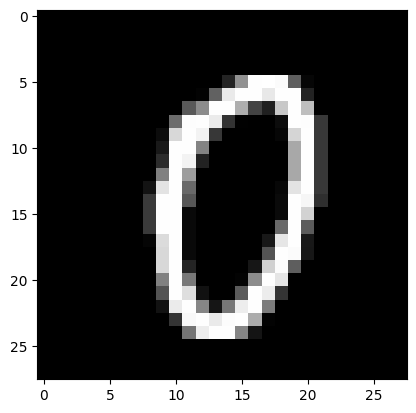

In [19]:
first_image = X_train[1000]
first_image = numpy.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [20]:
# Answer
print(y_train[1000])

0


In [21]:
# pixel total sum
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

784


In [22]:
# Transform pixels
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [18]:
print(first_image)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.
   18.  46. 136. 136. 244. 255. 241. 103.   0.   0.   0.  

In [25]:
# Transform values to 0 and 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

In [24]:
print(X_train2[100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [32]:
# Transforming values from train
y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)
print(y_train[1001])
print(y_train_h[1001])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]

 [[1. 0.]
  [0. 1.]]

 [[0. 1.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]]]


In [34]:
num_classes = y_test_h.shape[1]

In [53]:
# feed-forward
model = Sequential()

# Create the input layer
model.add(InputLayer(input_shape=num_pixels))

# Create the first network layer
model.add(Dense(1024, kernel_initializer='normal', activation='relu'))

# Second network layer
model.add(Dense(2048, kernel_initializer='normal', activation='relu'))

# Exit layer
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

In [44]:
# Print informations about the created model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              803840    
                                                                 
 dense_6 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_7 (Dense)             (None, 10)                20490     
                                                                 
Total params: 2923530 (11.15 MB)
Trainable params: 2923530 (11.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
